<a name = "inicio"></a>
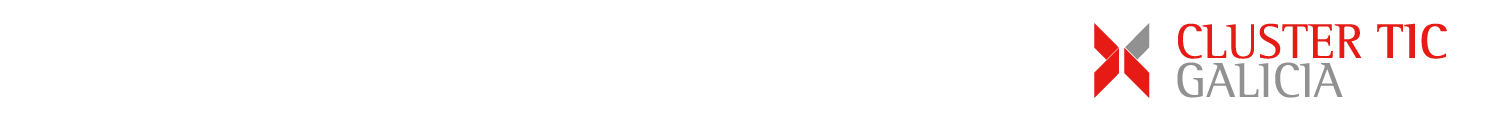

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Gestión de valores nulos</div>

In [1]:
import numpy as np
import pandas as pd

# Gestión de valores nulos

Un aspecto crítico en todo análisis de datos es la gestión de los valores nulos, representados en por la valor **NaN** ("Not a Number"). Este valor se encuentra disponible en NumPy:

In [2]:
np.nan

nan

Pandas ofrece diferentes funciones y métodos para gestionar estos valores. Veamos los más importantes.

### La función pd.isnull()

La función [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) devuelve una estructura con las mismas dimensiones que la que se pasa como argumento sustituyendo cada valor por el booleano *True* si el correspondiente elemento es un valor nulo, y por el booleano *False* en caso contrario.

Esta función es equivalente a [pandas.isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html).

Por ejemplo, podemos aplicarla a una serie:

In [3]:
s = pd.Series([1, np.nan, 7, np.nan, 3])
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

In [4]:
pd.isnull(s)

0    False
1     True
2    False
3     True
4    False
dtype: bool

Esta funcionalidad también se ofrece como método:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html

In [5]:
s.isnull()

0    False
1     True
2    False
3     True
4    False
dtype: bool

También podemos aplicarla a un dataframe:

In [6]:
sales = pd.DataFrame({
    "A":[3, np.nan, 1], 
    "B":[1, 5, np.nan],
    "C":[3, 7, 2],
    "D":[np.nan, 2, np.nan]
    },index = ["jan", "feb", "mar"])
sales

,A,B,C,D
jan,3.0,1.0,3,NaN
feb,NaN,5.0,7,2.0
mar,1.0,NaN,2,NaN


In [7]:
pd.isnull(sales)

,A,B,C,D
jan,False,False,False,True
feb,True,False,False,False
mar,False,True,False,True


recibiendo como resultado un dataframe.

También en este caso la funcionalidad está accesible como método:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

In [8]:
sales.isnull()

,A,B,C,D
jan,False,False,False,True
feb,True,False,False,False
mar,False,True,False,True


### El método .dropna()

El método **dropna** permite, de una forma muy conveniente, filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.

Aplicado a una serie, el método [pandas.Series.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html) devuelve una nueva serie tras eliminar los valores nulos:

In [9]:
s = pd.Series([1, np.nan, 7, np.nan, 3])
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

In [10]:
s.dropna()

0    1.0
2    7.0
4    3.0
dtype: float64

Aplicado a un dataframe, el método [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) ofrece algo más de funcionalidad: podemos escoger si queremos eliminar filas o columnas, y si queremos eliminarlas cuando todos sus elementos sean nulos o simplemente cuando alguno de ellos lo sea. Por ejemplo:

In [11]:
sales = pd.DataFrame({
    "A":[1, 5, 4, 7], 
    "B":[np.nan, 4, 1, np.nan],
    "C":[3, 7, 2, 1],
    "D":[np.nan, 2, 2, 3]
    }, index = ["Ene", "Feb", "Mar", "Abr"])
sales

,A,B,C,D
Ene,1,NaN,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


Por defecto, el método se aplica al eje 0, es decir, va a eliminar filas que incluyan valores nulos:

In [12]:
sales.dropna()

,A,B,C,D
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0


Si especificamos el eje 1, lo que se eliminan son las columnas que incluyan valores nulos:

In [13]:
sales.dropna(axis = 1)

,A,C
Ene,1,3
Feb,5,7
Mar,4,2
Abr,7,1


Mediante el parámetro **how** podemos controlar cómo queremos que se aplique el método: si toma el valor "*all*", solo se eliminarán las filas o columnas en las que todos sus elementos sean nulos. Si toma el valor "*any*" (valor por defecto), se eliminarán las filas o columnas en las que algún elemento sea nulo. De esta forma:

In [14]:
sales.dropna(how = "all")

,A,B,C,D
Ene,1,NaN,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


Vemos cómo ninguna fila se ha eliminado pues en ninguna de ellas todos los elementos nulos.

Sin embargo:

In [15]:
sales.dropna(how = "any")

,A,B,C,D
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0


sí elimina varias filas

Por otro lado, el parámetro **thresh** nos permite eliminar todas aquellas filas o columnas que no tengan un mínimo de valores no nulos. Por ejemplo:

In [16]:
sales.dropna(thresh = 3)

,A,B,C,D
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


eliminaría todas las filas que no tuviesen al menos tres valores no nulos (en nuestro ejemplo, la correspondiente a enero).

Por último, el parámetro **subset** nos permite especificar las filas o columnas que queremos considerar en la identificación de nulos. Por ejemplo:

In [17]:
sales.dropna(subset = ["B", "C"])

,A,B,C,D
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0


solo eliminará aquellas filas que tengan nulos en las columnas "*B*" o "*C*".

### El método .fillna()

El método **fillna** permite sustituir los valores nulos de una estructura pandas por otro valor (en el caso de los dataframes habrá que especificar el eje sobre el que queremos aplicar la función).

Podemos aplicarla en una serie ([pandas.Series.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html)):

In [18]:
s = pd.Series([1, np.nan, 7, np.nan, 3])
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

In [19]:
s.fillna(0)

0    1.0
1    0.0
2    7.0
3    0.0
4    3.0
dtype: float64

Hemos indicado el valor 0 como argumento, y es este valor el que se utiliza para sustituir los valores nulos de la serie original.

Y también podemos aplicarla en un dataframe ([pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)):

In [20]:
sales

,A,B,C,D
Ene,1,NaN,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


In [21]:
sales.fillna(0)

,A,B,C,D
Ene,1,0.0,3,0.0
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,0.0,1,3.0


### Los métodos .ffill() y .bfill()

Estos métodos nos permiten rellenar los nulos copiando los valores no nulos precedentes "hacia adelante" o los valores no nulos posteriores "hacia atrás".

Por ejemplo, en la siguiente serie:

In [22]:
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

Podemos rellenar los nulos con el valor no nulo que los preceda con el método **.ffill()**:

In [23]:
s.ffill()

0    1.0
1    1.0
2    7.0
3    7.0
4    3.0
dtype: float64

El método **.bfill()** rellena los nulos con el valor no nulo posterior:

In [24]:
s.bfill()

0    1.0
1    7.0
2    7.0
3    3.0
4    3.0
dtype: float64

Podemos aplicar estos métodos a un dataframe pandas, en cuyo caso tendremos que indicar el eje a lo largo del cual queremos que se realice el relleno:

In [25]:
sales

,A,B,C,D
Ene,1,NaN,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


In [26]:
sales.ffill()

,A,B,C,D
Ene,1,NaN,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,1.0,1,3.0


Por defecto, el eje considerado es el 0 (el eje vertical). En este ejemplo vemos cómo el primer valor de la columna D no se ha modificado pues no hay ningún valor no nulo anterior anterior (en el eje 0).

Y si aplicamos este método a lo largo del eje 1:

In [27]:
sales.ffill(axis = 1)

,A,B,C,D
Ene,1.0,1.0,3.0,3.0
Feb,5.0,4.0,7.0,2.0
Mar,4.0,1.0,2.0,2.0
Abr,7.0,7.0,1.0,3.0


En un caso práctico puede resultar recomendable utilizar "lógica de relleno" seguida de la asignación de un valor por defecto para los valores nulos que puedan seguir existiendo, para asegurarnos de que todos ellos han sido sustituidos adecuadamente:

In [28]:
sales.ffill().fillna(0)

,A,B,C,D
Ene,1,0.0,3,0.0
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,1.0,1,3.0


Comprobamos que, ahora, el valor correspondiente a la columna B del mes de enero ha recibido un valor.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>